In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skmob
from skmob.measures.individual import distance_straight_line, maximum_distance, number_of_visits, waiting_times, real_entropy
import math
from tqdm import tqdm
from numpy.linalg import norm
import traja


/home/ryn/anaconda3/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


In [3]:
f = pd.read_csv("Minute_Trajectories.csv")

In [4]:
print(f.keys())

Index(['minute_id', 'x', 'y', 't', 'id', 'dFrames', 's', 'v', 'a', 'disp',
       'theta', 'alpha', 'sin', 'cos', 'adist', 'wall', 'startDisp', 'endDisp',
       'antennaLx', 'antennaLy', 'antennaRx', 'antennaRy', 'legLx', 'legLy',
       'legRx', 'legRy', 'sub_traj_id'],
      dtype='object')


In [5]:
print(np.shape(f))

(3559500, 27)


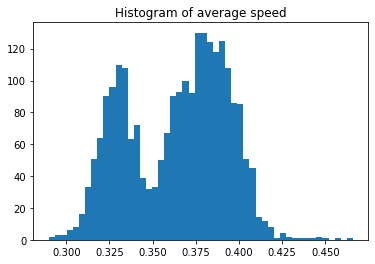

In [17]:
s_mean = f.groupby(['minute_id']).mean()['s']

plt.hist(s_mean,bins=50)
plt.title("Histogram of average speed")
plt.savefig("av_speed.png")
plt.show()

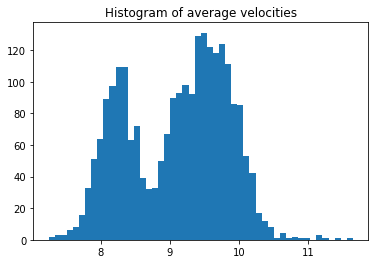

In [18]:
v_mean = f.groupby(['minute_id']).mean()['v']

plt.hist(v_mean,bins=50)
plt.title("Histogram of average velocities")
plt.savefig("av_vel.png")
plt.show()

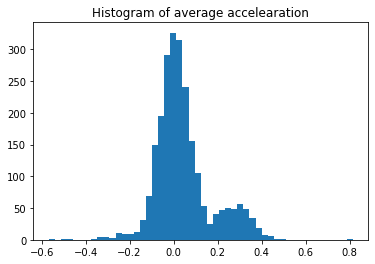

In [19]:
a_mean = f.groupby(['minute_id']).mean()['a']

plt.hist(a_mean,bins=50)
plt.title("Histogram of average accelearation")
plt.savefig("av_acc.png")
plt.show()

In [20]:
dt = np.asarray(100*f['t'])
f['datetime'] = dt

In [10]:
tdf = skmob.TrajDataFrame(f, latitude='x',longitude='y',datetime="datetime", user_id='minute_id')

In [11]:
tdf.head()

,uid,lat,lng,t,id,dFrames,s,v,a,disp,...,antennaLx,antennaLy,antennaRx,antennaRy,legLx,legLy,legRx,legRy,sub_traj_id,datetime
0,1,2094.527,650.2787,560.72,1.0,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1970-01-01 00:00:00.000056072
1,1,2094.736,651.0457,560.76,1.0,0.040039,0.794989,19.855340,NaN,0.794989,...,2093.780,652.8609,2096.481,652.1248,2093.578,651.3611,2095.894,650.7303,-1.0,1970-01-01 00:00:00.000056076
2,1,2094.904,651.2622,560.80,1.0,0.039978,0.274311,6.861540,-325.02350,1.053458,...,2094.720,653.3058,2096.930,651.5861,2093.957,651.9991,2095.851,650.5253,-1.0,1970-01-01 00:00:00.000056079
3,1,2095.030,650.9192,560.84,1.0,0.040039,0.365335,9.124466,56.51796,0.814511,...,2096.861,649.9928,2094.232,649.0291,2096.157,651.3322,2093.903,650.5062,-1.0,1970-01-01 00:00:00.000056084
4,1,2095.113,650.0417,560.88,1.0,0.039978,0.881443,22.048180,323.27050,0.632506,...,2096.648,648.6807,2093.861,648.4163,2096.308,650.1550,2093.918,649.9283,-1.0,1970-01-01 00:00:00.000056088


In [12]:
dsl_df = distance_straight_line(tdf)

100%|██████████| 2373/2373 [00:39<00:00, 60.61it/s]


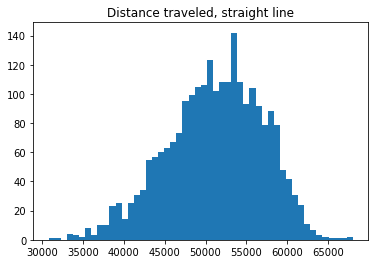

In [21]:
plt.hist(dsl_df["distance_straight_line"],bins = 50)
plt.title("Distance traveled, straight line")
plt.savefig("tot_dist.png")

In [22]:
md_df = maximum_distance(tdf)

100%|██████████| 2373/2373 [00:40<00:00, 58.71it/s]


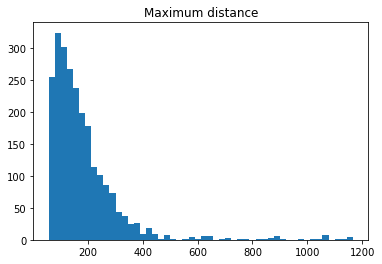

In [23]:
plt.hist(md_df['maximum_distance'],bins=50)
plt.title("Maximum distance")
plt.savefig("max_dist.png")

In [24]:
re_df = real_entropy(tdf)
plt.hist(re_df["real_entropy"])
plt.title("Real Entropy")

 30%|██▉       | 703/2373 [05:00<11:52,  2.34it/s]


KeyboardInterrupt: 

In [18]:
#Distance from Straight Line
d = []
for i in tqdm(range(1,2373)):
    d_tmp = 0
    for j in range(1,1499):
        p1 = f[f['minute_id']==i].iloc[0][['x','y']]
        p2 = f[f['minute_id']==i].iloc[1499][['x','y']]
        p3 = f[f['minute_id']==i].iloc[j][['x','y']]
        d_tmp += norm(np.cross(p2-p1, p1-p3))/norm(p2-p1)
    d.append(d_tmp)

 20%|█▉        | 469/2372 [3:14:33<13:09:27, 24.89s/it]   


KeyboardInterrupt: 

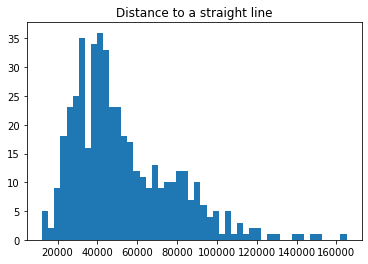

In [19]:
plt.hist(d,bins = 50)
plt.title("Distance to a straight line")
plt.savefig("Straight_Line_Distance.png")

In [ ]:
# Crossings Check
num_crossings = []
# for i in tqdm(range(1,2373)):
i = 3
id_crossings = 0
for j in tqdm(range(1500)):
    for k in range(j,1500):
        if(math.dist(f[f['minute_id']==i].iloc[j][['x','y']], f[f['minute_id']==i].iloc[k][['x','y']]) < 1):
            id_crossings += 1
num_crossings.append(id_crossings)

In [ ]:
plt.hist(num_crossings)

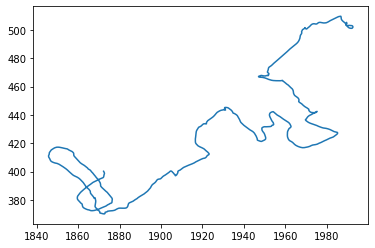

In [20]:
plt.plot(f[f["minute_id"]==3]['x'],f[f["minute_id"]==5]['y'])

In [25]:
df = traja.read_file('Minute_Trajectories.csv')

In [26]:
f['angles'] = traja.trajectory.calc_angle(df)

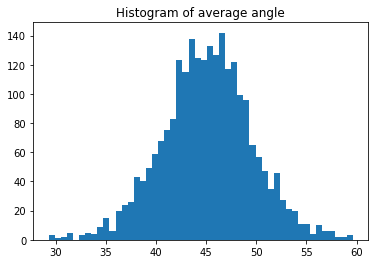

In [27]:
ang_mean = f.groupby(['minute_id']).mean()['angles']

plt.hist(ang_mean,bins=50)
plt.title("Histogram of average angle")
plt.savefig("av_angle.png")
plt.show()

In [28]:
print(f['angles'])

0                NaN
1          74.759155
2          52.193295
3          69.833740
4          84.596153
             ...    
3559495    31.928684
3559496    32.525715
3559497    33.625038
3559498    48.440666
3559499    49.078995
Name: angles, Length: 3559500, dtype: float32


In [ ]:
autocorr_angle = np.correlate(f['angles'][~np.isnan(f['angles'])],f['angles'][~np.isnan(f['angles'])],mode="full")

In [ ]:
plt.hist(autocorr_angle[~np.isnan(autocorr_angle)])